## Reading

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re

In [23]:
def clean(df, topk=False):
    df = df[df['State'] == 'finished']

    if topk:
        patterns = ['effective_l0$', 'frac_recovered$', 'mse_loss$', 'loss_original$', 'loss_reconstructed$']
    else:
        patterns = ['l0$', 'frac_recovered$', 'mse_loss$', 'loss_original$', 'loss_reconstructed$']
    filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]
    df = df[filtered_columns]
    df.columns = [col.split('/')[-1] for col in df.columns]
    
    if topk:
        l0 = df["effective_l0"].to_numpy().flatten()
    else:
        l0 = df["l0"].to_numpy().flatten()
    mse_loss = df["mse_loss"].to_numpy().flatten()
    frac_recovered = df["frac_recovered"].to_numpy().flatten()
    loss_original = df["loss_original"].to_numpy().flatten()
    loss_reconstructed = df["loss_reconstructed"].to_numpy().flatten()
    delta_ce = loss_reconstructed - loss_original

    data = np.array([l0, mse_loss, frac_recovered, delta_ce]).T
    df = pd.DataFrame(data, columns=['l0', 'mse_loss', 'frac_recovered', 'delta_ce'])
    df = df.sort_values(by='l0')
    return df

In [24]:
def clean_switch(df):
    df = df[df['State'] == 'finished']

    patterns = ['experts$', 'effective_l0$', 'mse_loss$', 'frac_recovered$', 'loss_original$', 'loss_reconstructed$', 'frac_recovered$']
    filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]
    df = df[filtered_columns]
    df.columns = [re.split(r'[./]', col)[-1] for col in df.columns]

    df = df.dropna(axis=1, how='any')
    
    l0 = df["effective_l0"].to_numpy().flatten()
    mse_loss = df["mse_loss"].to_numpy().flatten()
    experts = df["experts"].to_numpy().flatten()
    loss_original = df["loss_original"].to_numpy().flatten()
    loss_reconstructed = df["loss_reconstructed"].to_numpy().flatten()
    frac_recovered = df["frac_recovered"].to_numpy().flatten()
    delta_ce = loss_reconstructed - loss_original

    data = np.array([experts, l0, mse_loss, frac_recovered, delta_ce]).T
    df = pd.DataFrame(data, columns=['experts', 'l0', 'mse_loss', 'frac_recovered', 'delta_ce'])
    df = df.sort_values(by='l0')
    return df

In [25]:
df_relu = pd.read_csv("primary-relu.csv")
df_relu = clean(df_relu)

df_gated = pd.read_csv("primary-gated.csv")
df_gated = clean(df_gated)

df_topk = pd.read_csv("primary-topk.csv")
df_topk = clean(df_topk, topk=True)

In [26]:
df_relu.to_csv("primary-relu-clean.csv")
df_gated.to_csv("primary-gated-clean.csv")
df_topk.to_csv("primary-topk-clean.csv")

In [33]:
df_relu = pd.read_csv("primary-relu-clean.csv")
df_gated = pd.read_csv("primary-gated-clean.csv")
df_topk = pd.read_csv("primary-topk-clean.csv")

In [28]:
df_switch = pd.read_csv("primary-switch-fast.csv")
df_switch = clean_switch(df_switch)

In [29]:
df_switch

,experts,l0,mse_loss,frac_recovered,delta_ce
6,64.0,8.0,2262.835938,0.960305,0.557089
22,16.0,8.0,2254.317139,0.962151,0.531175
14,32.0,8.0,2244.557373,0.961925,0.534355
23,16.0,16.0,1674.737305,0.980826,0.274767
7,64.0,16.0,1793.988525,0.977019,0.329318
15,32.0,16.0,1715.283203,0.978808,0.303676
20,16.0,32.0,1296.666138,0.988825,0.156826
4,64.0,32.0,1471.864502,0.985184,0.207928
8,32.0,32.0,1363.875000,0.987606,0.173940
21,16.0,48.0,1147.791748,0.991167,0.126576


In [30]:
df_switch16 = df_switch[df_switch['experts'] == 16]
df_switch32 = df_switch[df_switch['experts'] == 32]
df_switch64 = df_switch[df_switch['experts'] == 64]
#df_switch128 = df_switch[df_switch['experts'] == 128]

## Plotting

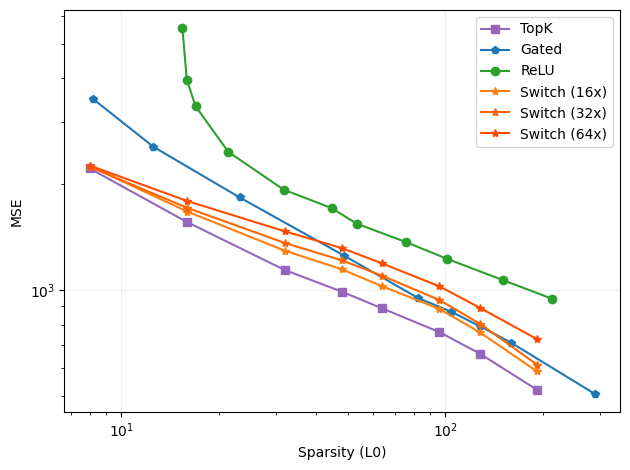

In [34]:
plt.plot(df_topk['l0'], df_topk['mse_loss'], label='TopK', marker='s', color='#9467bd')
plt.plot(df_gated['l0'], df_gated['mse_loss'], label='Gated', marker='p', color='#1f77b4')
plt.plot(df_relu['l0'], df_relu['mse_loss'], label='ReLU', marker='o', color='#2ca02c')

plt.plot(df_switch16['l0'], df_switch16['mse_loss'], label='Switch (16x)', marker='*', color='#ff7f0e')
plt.plot(df_switch32['l0'], df_switch32['mse_loss'], label='Switch (32x)', marker='*', color='#ff6600')
plt.plot(df_switch64['l0'], df_switch64['mse_loss'], label='Switch (64x)', marker='*', color='#ff4d00')
#plt.plot(df_switch128['l0'], df_switch128['mse_loss'], label='Switch (128x)', marker='*', color='#ff3300')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("MSE")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("l0_mse.png")
plt.show()

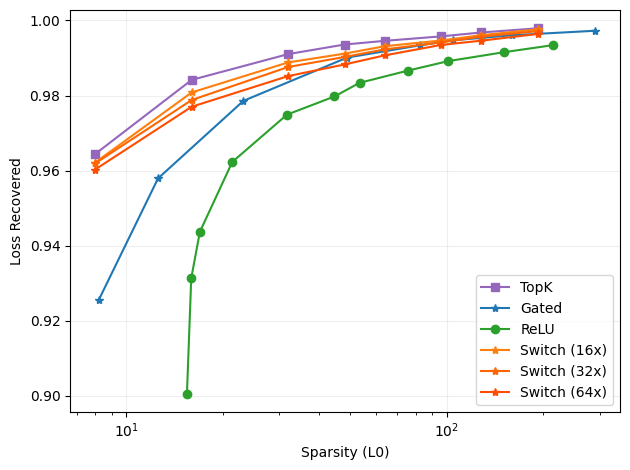

In [37]:
plt.plot(df_topk['l0'], df_topk['frac_recovered'], label='TopK', marker='s', color='#9467bd')
plt.plot(df_gated['l0'], df_gated['frac_recovered'], label='Gated', marker='*', color='#1f77b4')
plt.plot(df_relu['l0'], df_relu['frac_recovered'], label='ReLU', marker='o', color='#2ca02c')

plt.plot(df_switch16['l0'], df_switch16['frac_recovered'], label='Switch (16x)', marker='*', color='#ff7f0e')
plt.plot(df_switch32['l0'], df_switch32['frac_recovered'], label='Switch (32x)', marker='*', color='#ff6600')
plt.plot(df_switch64['l0'], df_switch64['frac_recovered'], label='Switch (64x)', marker='*', color='#ff4d00')
#plt.plot(df_switch128['l0'], df_switch128['mse_loss'], label='Switch (128x)', marker='*', color='#ff3300')


plt.xscale('log')
#plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("Loss Recovered")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("l0_lossrec.png")
plt.show()

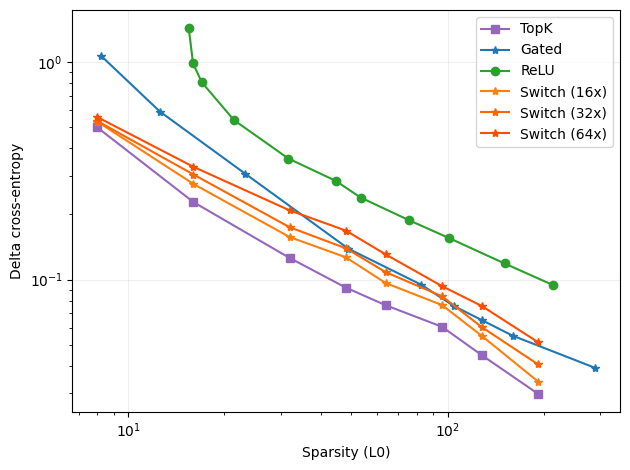

In [38]:
plt.plot(df_topk['l0'], df_topk['delta_ce'], label='TopK', marker='s', color='#9467bd')
plt.plot(df_gated['l0'], df_gated['delta_ce'], label='Gated', marker='*', color='#1f77b4')
plt.plot(df_relu['l0'], df_relu['delta_ce'], label='ReLU', marker='o', color='#2ca02c')

plt.plot(df_switch16['l0'], df_switch16['delta_ce'], label='Switch (16x)', marker='*', color='#ff7f0e')
plt.plot(df_switch32['l0'], df_switch32['delta_ce'], label='Switch (32x)', marker='*', color='#ff6600')
plt.plot(df_switch64['l0'], df_switch64['delta_ce'], label='Switch (64x)', marker='*', color='#ff4d00')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("Delta cross-entropy")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("l0_deltace.png")
plt.show()

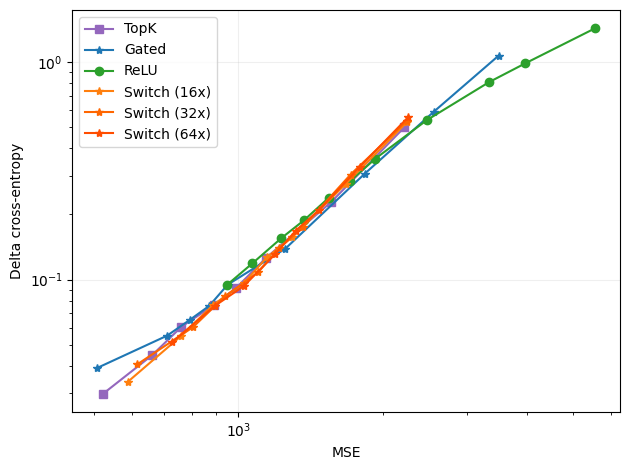

In [39]:
plt.plot(df_topk['mse_loss'], df_topk['delta_ce'], label='TopK', marker='s', color='#9467bd')
plt.plot(df_gated['mse_loss'], df_gated['delta_ce'], label='Gated', marker='*', color='#1f77b4')
plt.plot(df_relu['mse_loss'], df_relu['delta_ce'], label='ReLU', marker='o', color='#2ca02c')

plt.plot(df_switch16['mse_loss'], df_switch16['delta_ce'], label='Switch (16x)', marker='*', color='#ff7f0e')
plt.plot(df_switch32['mse_loss'], df_switch32['delta_ce'], label='Switch (32x)', marker='*', color='#ff6600')
plt.plot(df_switch64['mse_loss'], df_switch64['delta_ce'], label='Switch (64x)', marker='*', color='#ff4d00')


plt.xscale('log')
plt.yscale('log')

plt.xlabel("MSE")
plt.ylabel("Delta cross-entropy")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("mse_deltace.png")
plt.show()